<a href="https://colab.research.google.com/github/xaximpvp2/master/blob/main/codigo_aula5_metodo_do_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método do Gradiente para Regressão Linear

## Objetivo
Com este código, você irá:
- automatizar o processo de otimizar $w$ e $b$ usando o Método do Gradiente.

## Ferramentas

Nesse código, você usará:
- NumPy, uma biblioteca popular para cálculos matriciais, etc
- Matplotlib, uma biblioteca popular para gerar figuras a partir de dados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


## Definição do Problema


Usaremos as mesmas amostras de dados que já utilizamos em códigos anteriores:

| Corrente (A)     | Tensão (V) |
| -------------------| ------------------------ |
| 0.2               | 21                      |
| 4.5               | 430                      |

In [ ]:
# Carregando nosso conjunto de dados:
x_trein = np.array([0.2, 4.5])       # característica
y_trein = np.array([21.0, 430.0])    # valor alvo

## Calculando o Custo

Essa parte foi desenvolvida no nosso último código. Vamos precisar aqui novamente:

In [ ]:
def calcula_custo(x, y, w, b):
    """
    Calcula a função custo no âmbito da regressão linear.
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      y (ndarray (m,)): Valores alvo de saída
      w,b (escalar)   : Parâmetros do modelo
    Retorna
      custo_total (float): O custo custo de se usar w,b como parâmetros na regressão linear
               para ajustar os dados
    """
    # número de amostras de treinamento
    m = x.shape[0]

    soma_custo = 0
    for i in range(m):
        f_wb = w * x[i] + b
        custo = (f_wb - y[i]) ** 2
        soma_custo = soma_custo + custo
    custo_total = (1 / (2 * m)) * soma_custo

    return custo_total


## Método do Gradiente
Por enquanto, você já desenvolveu um modelo linear que estima $f_{w,b}(x^{(i)})$:

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

Na regressão linear, você utiliza dados de treinamento para ajustar os parâmetros $w$,$b$ minimizando o erro entre suas previsões $f_{w,b}(x^{(i)})$ e os dados verdadeiros $y^{(i)}$. A soma dos erros quadráticos para todas as amostras $(x^{(i)},y^{(i)})$ é chamada de custo, e é denotada por $J(w,b)$:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$


O Método do Gradiente então consiste em:

$$\begin{align*} \text{repetir}&\text{ até convergir:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
onde os parâmetros $w$, $b$ devem ser atualizados simultaneamente.  

O gradiente é definido como:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Aqui, 'simultaneamente' significa que você deve calcular as derivadas parciais para todos os parâmetros antes de atualizar qualquer um desses parâmetros.


## Implementando o Método do Gradiente na Prática.
Você irá implementar o método do gradiente para uma única variável (característica). Para fazer isso, você precisará de três funções:
- `calcula_gradiente` implementando as equações (4) e (5) acima descritas
- `calcula_custo` implementando a equação (2) acima
- `metodo_do_gradiente`, utilizando as funções calcula_gradiente e calcula_custo

Convenções:
- A terminologia que usaremos em Python para variáveis contendo derivadas parciais é a serguinte: $\frac{\partial J(w,b)}{\partial b}$  será `dj_db`.




### calcula_gradiente


`calcula_gradiente`  implementa (4) e (5) acima e retorna $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$.

In [ ]:
def calcula_gradiente(x, y, w, b):
    """
    Calcula o gradiente para Regressão Linear
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      y (ndarray (m,)): Valores alvo de saída
      w,b (scalar)    : parâmetros do modelo
    Retorna
      dj_dw (scalar): O gradiente do custo em relação ao parâmetros w
      dj_db (scalar): O gradiente do custo em relação ao parâmetros b
     """

    # Número de amostras de treinamento
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_db += dj_db_i
        dj_db  = dj_db + dj_db_i

        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

<br/>

### Testando nossa implementação da função calcula_gradiente


Utilizando as linhas de código abaixo, teste diferentes valores para $b$ e $w$ com o objetivo de encontrar o valor mínimo da função custo $J(w,b)$

In [ ]:
b = 0
w = 95

dj_dw, dj_db = calcula_gradiente(x_trein, y_trein, w, b)

print(dj_dw)

print(dj_db)

-5.825
-4.5


### Método do Gradiente

Agora que o gradiente pode ser calculado, o Método do Gradiente, descrito na equação (3), é implementado abaixo por meio da função `metodo_do_gradiente`. Os detalhes da implementação estão descritos nos comentários. Abaixo, você vai utilizar essa função para encontrar os valores ótimos para $w$ e $b$ levando em conta o conjunto de dados de treinamento.

In [ ]:
def metodo_do_gradiente(x, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o Método do Gradiente para ajustar w,b. Atualiza w,b ao longo de
    num_iters passos (iterações) assumindo uma taxa de aprendizado alpha

    Argumentos da função:
      x (ndarray (m,))  : Conjunto de dados com m amostras
      y (ndarray (m,))  : Valores alvo de saída
      w_in,b_in (scalar): valores iniciais para os parâmetros w,b
      alpha (float):      taxa de aprendizado
      num_iters (int):    número de iterações para o método
      calcula_custo:      função responsável por calcular o custo
      calcula_gradiente:  função responsável por calcular o gradiente

    Retorna:
      w (scalar): Valor atualizado para w após rodar o Método do Gradiente
      b (scalar): Valor atualizado para b após rodar o Método do Gradiente
      J_history (List): Contém o histórico dos valores de custo
      p_history (list): Contém o histórico dos valores para [w,b]
      """

    # Arrays que armazenam os valores históricos de J e w para cada iteração para que seja possível fazer gráfico depois
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calcula o gradiente usando a função calcula_gradiente
        dj_dw, dj_db = calcula_gradiente(x, y, w , b)

        # Atualiza os parâmetros w,b a partir do gradiente calculado
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Salva o custo J para cada iteração
        if i<100000:
            J_history.append( calcula_custo(x, y, w , b))
            p_history.append([w,b])
        # Faz print em tempo real enquanto o Método do Gradiente estiver rodando
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteração {i:4}: Custo {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #retorna w,b e valores históricos

In [ ]:
# Inicialização de parâmetros
w_init = 0
b_init = 0
# Parametrização do Método do Gradiente:
iteracoes = 3000
alpha = 1.0e-2
# Roda o método do gradiente
w_final, b_final, J_hist, p_hist = metodo_do_gradiente(x_trein ,y_trein, w_init, b_init, alpha,
                                                    iteracoes, calcula_custo, calcula_gradiente)
print(f"(w,b) Encontrados pelo Método do Gradiente: ({w_final:8.4f},{b_final:8.4f})")

Iteração    0: Custo 3.65e+04  dj_dw: -9.696e+02, dj_db: -4.510e+02   w:  9.696e+00, b: 4.51000e+00
Iteração  300: Custo 2.75e+00  dj_dw: -7.173e-01, dj_db:  2.848e+00   w:  9.424e+01, b: 5.43770e+00
Iteração  600: Custo 2.02e-02  dj_dw: -6.139e-02, dj_db:  2.437e-01   w:  9.504e+01, b: 2.27296e+00
Iteração  900: Custo 1.48e-04  dj_dw: -5.255e-03, dj_db:  2.086e-02   w:  9.511e+01, b: 2.00210e+00
Iteração 1200: Custo 1.08e-06  dj_dw: -4.497e-04, dj_db:  1.785e-03   w:  9.512e+01, b: 1.97891e+00
Iteração 1500: Custo 7.93e-09  dj_dw: -3.849e-05, dj_db:  1.528e-04   w:  9.512e+01, b: 1.97693e+00
Iteração 1800: Custo 5.81e-11  dj_dw: -3.295e-06, dj_db:  1.308e-05   w:  9.512e+01, b: 1.97676e+00
Iteração 2100: Custo 4.26e-13  dj_dw: -2.820e-07, dj_db:  1.119e-06   w:  9.512e+01, b: 1.97675e+00
Iteração 2400: Custo 3.12e-15  dj_dw: -2.413e-08, dj_db:  9.581e-08   w:  9.512e+01, b: 1.97674e+00
Iteração 2700: Custo 2.28e-17  dj_dw: -2.066e-09, dj_db:  8.200e-09   w:  9.512e+01, b: 1.97674e+00


Observe algumas características do Método do Gradiente:

- O Custo começa elevado e decai rapidamente, conforme vimos na teoria.
- As derivadas parciais, `dj_dw`, e `dj_db` também diminuem, inicialmente mais rapidamente e depois mais devagar. Isso acontece porque as derivadas parciais se aproximam de zero à medida com que nos aproximamos do mínimo da função

### Custo versus iterações no Método do Gradiente

Um gráfico do custo versus iterações é uma métrica interessante para verificarmos o progresso feito pelo método. O custo deve sempre decair ao longo das iterações. A mudança no custo é rápida inicialmente, portanto, é útil plotar as primeiras iterações numa escala diferente das últimas iterações. Observe as escalas usadas nos gráficos abaixo.

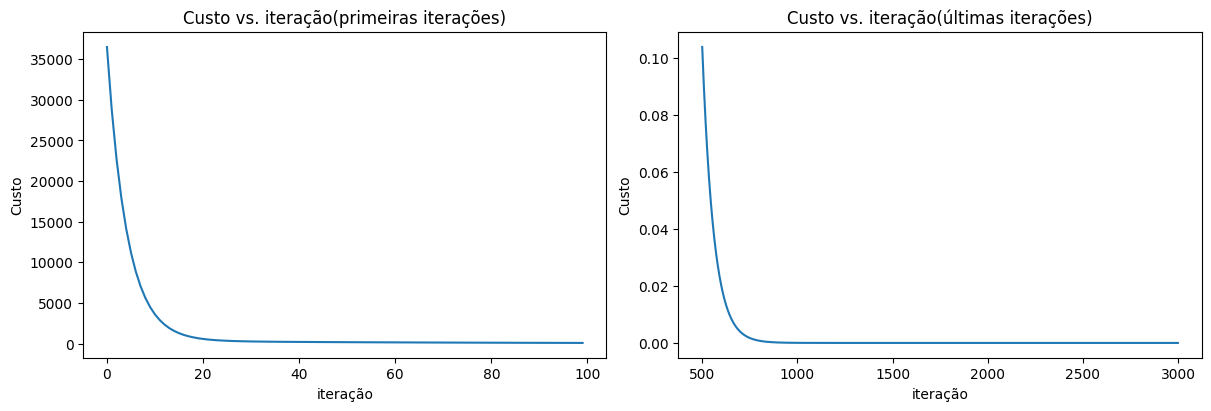

In [ ]:
# gráficos do custo versus iterações
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Custo vs. iteração(primeiras iterações)");  ax2.set_title("Custo vs. iteração(últimas iterações)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')  ;  ax2.set_xlabel('iteração')
plt.show()

### Previsões


Agora que você já descobriu os valores ótimos para os parâmetros $w$ e $b$, você pode usar o modelo para prever o valor de tensão do resistor para diferentes valores de corrente.

Olhe os exemplos abaixo:


In [ ]:
print(f"Para uma corrente de 1 A temos uma tensão esperada de {w_final*1.0 + b_final:0.1f} Volts")
print(f"Para uma corrente de 2.35 A temos uma tensão esperada de {w_final*2.35 + b_final:0.1f} Volts")
print(f"Para uma corrente de 3 A temos uma tensão esperada de {w_final*3.0 + b_final:0.1f} Volts")

Para uma corrente de 1 A temos uma tensão esperada de 97.1 Volts
Para uma corrente de 2.35 A temos uma tensão esperada de 225.5 Volts
Para uma corrente de 3 A temos uma tensão esperada de 287.3 Volts



## Parabéns!
Você aprendeu o seguinte com esse código:
- Detalhes importantes acerca do Método do Gradiente para uma variável
- Desenvolveu uma rotina para o cálculo do gradiente
- completou a rotina que aplica o Método do Gradiente
- Utilizou o Método do Gradiente para encontrar os parâmetros ótimos para um modelo na forma de reta